In [ ]:
#Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fb=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Facebook data RBE v0.2.csv') #Read facebook data csv file


In [ ]:
fb.head() #display top 10 rows

,Page Name,User Name,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,...,Benchmark Care,Benchmark Post Views,Benchmark Total Views,URL,Message,Link,Image Text,Link Text,Total Interactions (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x ),Overperforming Score
0,Hungry Brain,hungrybrain.in,2022-09-19 09:13:32 BST,19/09/2022,09:13:32,Video,17,12,3,1,...,2,141,0,https://www.facebook.com/100064050335417/posts...,"Worried about your childs brain development, w...",https://www.facebook.com/hungrybrain.in/videos...,NaN,NaN,17.0,-2.65
1,Hungry Brain,hungrybrain.in,2022-09-11 04:34:52 BST,11/09/2022,04:34:52,Photo,12,10,1,1,...,2,0,0,https://www.facebook.com/100064050335417/posts...,Comment below your most favorite parenting rec...,https://www.facebook.com/photo.php?fbid=458124...,hungrybrain pиo3Hebl ዲመየልካም pheeing aeda hungr...,NaN,12.0,-3.33
2,Hungry Brain,hungrybrain.in,2022-08-25 07:26:28 BST,25/08/2022,07:26:28,Video,8,6,2,0,...,2,141,0,https://www.facebook.com/100064050335417/posts...,"At just 4 months of age, these Hungry Brain ba...",https://www.facebook.com/hungrybrain.in/videos...,NaN,NaN,8.0,-5.62
3,Hungry Brain,hungrybrain.in,2022-06-27 06:50:53 BST,27/06/2022,06:50:53,Video,8,7,1,0,...,2,141,0,https://www.facebook.com/100064050335417/posts...,A 16 month old baby boy named Krishiv Raval's ...,https://www.facebook.com/hungrybrain.in/videos...,NaN,Incredible 16 months old krishiv response to b...,8.0,-5.62
4,Hungry Brain,hungrybrain.in,2022-06-24 12:39:13 BST,24/06/2022,12:39:13,Video,8,8,0,0,...,2,141,0,https://www.facebook.com/100064050335417/posts...,"Krisshiv doesn’t just dress and look smart, th...",https://www.facebook.com/hungrybrain.in/videos...,NaN,NaN,8.0,-5.62


In [ ]:
fb.shape #no of rows and columns


(85, 39)

In [ ]:
fb.info() #dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 39 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Page Name                                                                                                 85 non-null     object 
 1   User Name                                                                                                 85 non-null     object 
 2   Post Created                                                                                              85 non-null     object 
 3   Post Created Date                                                                                         85 non-null     object 
 4   Post Created Time                                                                 

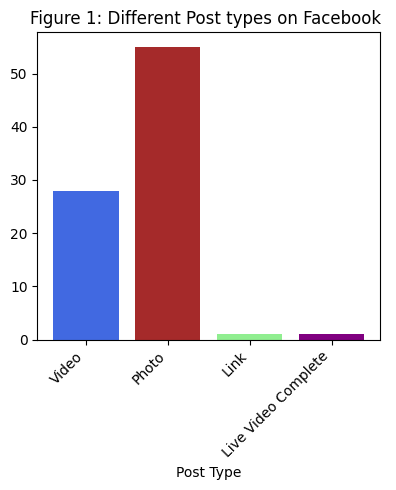

In [ ]:
#ANALYSIS OF NUMBER OF DIFFERENT POSTS IN FACEBOOK

post_types = {}
for index, row in fb.iterrows():
    post_type = row["Type"]
    if post_type not in post_types:
        post_types[post_type] = 0
    post_types[post_type] += 1

# Convert the dictionary to a DataFrame
post_types_fb = pd.DataFrame.from_dict(post_types, orient="index", columns=["count"]).reset_index()
post_types_fb.columns = ["post_type", "count"]

# Create a bar plot to visualize the post types and counts
color=['royalblue','brown','lightgreen','purple','grey']
plt.figure(figsize=(4, 5))
plt.bar(post_types_fb["post_type"], post_types_fb["count"],color=color)
plt.xlabel("Post Type")
plt.title("Figure 1: Different Post types on Facebook ")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#PREPROCESS MESSAGE COLUMN FOR FURTHER ANALYSIS

fb['cleanLinks'] = fb['Message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'@\w+', '').str.strip()
fb['cleanLinks']

<ipython-input-275-7890b14fd4b5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'@\w+', '').str.strip()


0     Worried about your childs brain development, w...
1     Comment below your most favorite parenting rec...
2     At just 4 months of age, these Hungry Brain ba...
3     A 16 month old baby boy named Krishiv Raval's ...
4     Krisshiv doesn’t just dress and look smart, th...
                            ...                        
80                                                  nan
81    We heartily congratulate our Founder  for the ...
82    Physical development for toddlers 😍 . . . . #a...
83    As we said yesterday.. we're upto something su...
84    Parenting can be challenging sometimes. Do use...
Name: cleanLinks, Length: 85, dtype: object

In [ ]:
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'^www.\S*', '', regex=True).str.strip()
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r' www.\S*', '', regex=True).str.strip()

In [ ]:
fb['cleanLinks']

0     Worried about your childs brain development, w...
1     Comment below your most favorite parenting rec...
2     At just 4 months of age, these Hungry Brain ba...
3     A 16 month old baby boy named Krishiv Raval's ...
4     Krisshiv doesn’t just dress and look smart, th...
                            ...                        
80                                                  nan
81    We heartily congratulate our Founder  for the ...
82    Physical development for toddlers 😍 . . . . #a...
83    As we said yesterday.. we're upto something su...
84    Parenting can be challenging sometimes. Do use...
Name: cleanLinks, Length: 85, dtype: object

In [ ]:
#Searches for an instance of ".co"
#Then, looks to match 0 or more surrounding non-whitespace characters considering both preceding and following
#ensures there is at least a single instance of / preceding
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'\S*/+\S*.co\S*', '', regex=True).str.strip()
#Same as above, but ensures there is following / rather than preceding
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'\S*.co\S*/+\S*', '', regex=True).str.strip()

In [ ]:
#Remove the ": " which occurs at the beginning of a tweet as a result
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'^: ', '').str.strip()
#Remove instances of "RT :" which are preceded by a space character
fb['cleanLinks'] = fb['cleanLinks'].str.replace(r' RT :*', '').str.strip()

<ipython-input-279-2bacc99b7843>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  fb['cleanLinks'] = fb['cleanLinks'].str.replace(r'^: ', '').str.strip()
<ipython-input-279-2bacc99b7843>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  fb['cleanLinks'] = fb['cleanLinks'].str.replace(r' RT :*', '').str.strip()


In [ ]:
fb['cleanLinks'] = fb['cleanLinks'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
fb['cleanLinks']

<ipython-input-280-5a98c4ce44e0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  fb['cleanLinks'] = fb['cleanLinks'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)


0     Worried about your childs brain development, w...
1     Comment below your most favorite parenting rec...
2     At just 4 months of age, these Hungry Brain ba...
3     A 16 month old baby boy named Krishiv Ravals c...
4     Krisshiv doesnt just dress and look smart, tha...
                            ...                        
80                                                  nan
81    We heartily congratulate our Founder  for the ...
82    Physical development for toddlers  . . . . #ac...
83    As we said yesterday.. were upto something sup...
84    Parenting can be challenging sometimes. Do use...
Name: cleanLinks, Length: 85, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)
fb['filtered_cleanLinks']=fb['cleanLinks'].apply(remove_stopwords)
fb['filtered_cleanLinks']

0     Worried childs brain development, well got cov...
1     Comment favorite parenting recipe #growingupwi...
2     At 4 months age, Hungry Brain babies started s...
3     A 16 month old baby boy named Krishiv Ravals c...
4     Krisshiv doesnt dress look smart, thanks modul...
                            ...                        
80                                                  nan
81    We heartily congratulate Founder great achieve...
82    Physical development toddlers . . . . #activec...
83    As said yesterday.. upto something super inter...
84    Parenting challenging sometimes. Do use sugges...
Name: filtered_cleanLinks, Length: 85, dtype: object

In [ ]:
def word_tokenize(text):
  tokens = nltk.word_tokenize(text)
  return tokens

fb['tokenised_cleanLinks']=fb['filtered_cleanLinks'].apply(word_tokenize)
fb['tokenised_cleanLinks']

0     [Worried, childs, brain, development, ,, well,...
1     [Comment, favorite, parenting, recipe, #, grow...
2     [At, 4, months, age, ,, Hungry, Brain, babies,...
3     [A, 16, month, old, baby, boy, named, Krishiv,...
4     [Krisshiv, doesnt, dress, look, smart, ,, than...
                            ...                        
80                                                [nan]
81    [We, heartily, congratulate, Founder, great, a...
82    [Physical, development, toddlers, ., ., ., ., ...
83    [As, said, yesterday, .., upto, something, sup...
84    [Parenting, challenging, sometimes, ., Do, use...
Name: tokenised_cleanLinks, Length: 85, dtype: object

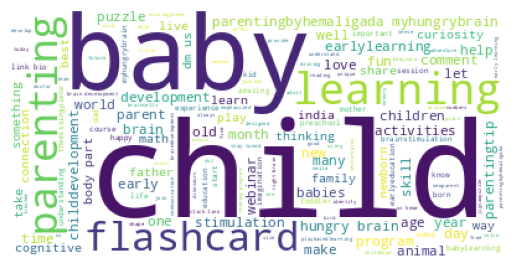

In [ ]:
# WORD CLOUD ANALYSIS OF FACEBOOK POST TEXTS

comment_words = ''
stopwords = set(STOPWORDS)

for words in fb['filtered_cleanLinks']:

    words = str(words)
    tokens = words.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(stopwords = stopwords,background_color ='white').generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
#plt.title('Most Frequently Used Words in Facebook Posts')
plt.show()


In [ ]:
#SENTIMENT ANALYSIS OF FACEBOOK POST TEXTS

sia = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
  sentiment=sia.polarity_scores(text)
  compound_score=sentiment['compound']
  return compound_score

fb['sentiment']=fb['filtered_cleanLinks'].apply(get_sentiment)
fb['sentiment']

0    -0.0258
1     0.4588
2     0.8720
3     0.6597
4     0.7745
       ...  
80    0.0000
81    0.9393
82    0.0000
83    0.8281
84    0.5423
Name: sentiment, Length: 85, dtype: float64

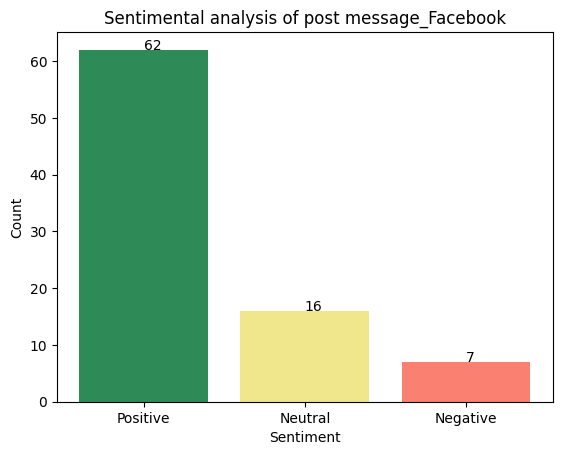

In [ ]:
sentiment_count=pd.cut(fb['sentiment'],bins=3,labels=['Negative','Neutral','Positive']).value_counts()
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])
color=['seagreen','khaki','salmon']
plt.bar(sentiment_count.index,sentiment_count.values,color=color)
addlabels(sentiment_count.index,sentiment_count.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentimental analysis of post message_Facebook')
plt.show()


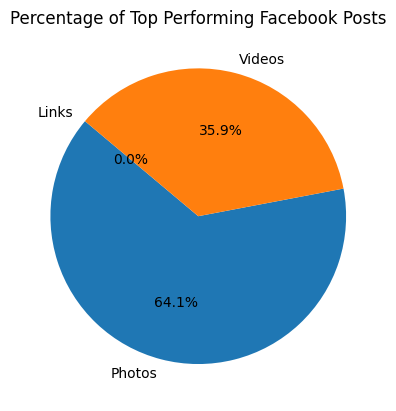

In [ ]:
#ANALYSIS OF TOP PERFORMING POSTS

photo_count=0
link_count=0
video_count=0

fb_score=fb.sort_values(by='Overperforming Score',ascending=False)
top_40_rows=fb_score.iloc[:40]


for index,row in top_40_rows.iterrows():
  if row['Type']=='Photo':
    photo_count +=1
  elif row['Type']=='Video':
    video_count +=1
  elif row['Type']=='Link':
    link_count +=1

photo_percentage=(photo_count/len(fb['Type']))*100
video_percentage=(video_count/len(fb['Type']))*100
link_percentage=(link_count/len(fb['Type']))*100

labels=['Photos','Videos','Links']
sizes=[photo_percentage,video_percentage,link_percentage]


plt.pie(sizes,labels=labels,autopct="%1.1f%%",startangle=140)
plt.title('Percentage of Top Performing Facebook Posts')
plt.show()

In [ ]:
def lemmatize(word):
  lemmatizer = WordNetLemmatizer()

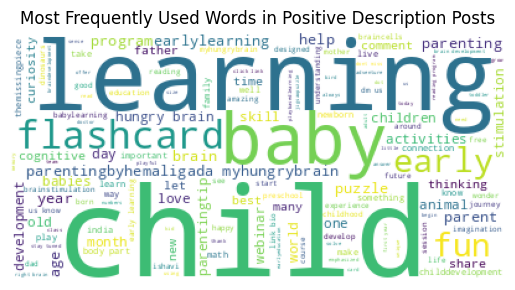

In [ ]:
#LEXICAL ANALYSIS OF POSITIVE AND NEGATIVE POSTS

positive_sentiments=fb.loc[fb['sentiment']>0]
negative_sentiments=fb.loc[fb['sentiment']<0]
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for words in positive_sentiments['filtered_cleanLinks']:

    words = str(words)
    tokens = words.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(stopwords = stopwords,background_color ='White').generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Frequently Used Words in Positive Description Posts')
plt.show()

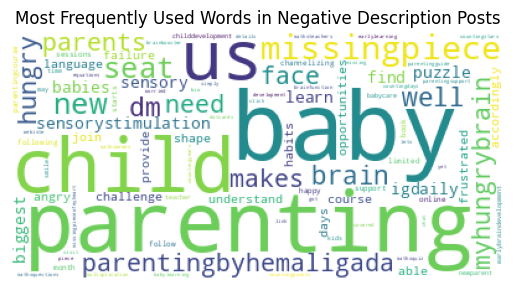

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

for words in negative_sentiments['filtered_cleanLinks']:

    words = str(words)
    tokens = words.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(stopwords = stopwords,background_color ='White').generate(comment_words)

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Frequently Used Words in Negative Description Posts')
plt.show()

In [ ]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')
positive_sentence_tokens = positive_sentiments['filtered_cleanLinks'].apply(nltk.word_tokenize)

positive_sentence_tokens[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


1     [Comment, favorite, parenting, recipe, #, grow...
2     [At, 4, months, age, ,, Hungry, Brain, babies,...
3     [A, 16, month, old, baby, boy, named, Krishiv,...
4     [Krisshiv, doesnt, dress, look, smart, ,, than...
5     [Flashcards, something, emphasized, many, rega...
6     [Its, time, dad, play, using, .in, Flash, card...
7     [Its, never, early, start, building, thinking,...
8     [Hungry, Brain, offer, Early, Brain, Stimulati...
9     [A, father, hold, daughters, hand, short, whil...
10    [Babies, often, misunderstood, someone, dont, ...
Name: filtered_cleanLinks, dtype: object

In [ ]:
lemmatize(positive_sentiments['filtered_cleanLinks'])
positive_sentiment_pos_tag=positive_sentiments['filtered_cleanLinks'].apply(lambda text: pos_tag(text.split(' ')))
positive_sentiment_pos_tag[:10]

1     [(Comment, NNP), (favorite, RB), (parenting, V...
2     [(At, IN), (4, CD), (months, NNS), (age,, RB),...
3     [(A, DT), (16, CD), (month, NN), (old, JJ), (b...
4     [(Krisshiv, NNP), (doesnt, NN), (dress, NN), (...
5     [(Flashcards, NNS), (something, NN), (emphasiz...
6     [(Its, PRP$), (time, NN), (dad, NN), (play, NN...
7     [(Its, PRP$), (never, RB), (early, JJ), (start...
8     [(Hungry, JJ), (Brain, NNP), (offer, VBP), (Ea...
9     [(A, DT), (father, NN), (hold, NN), (daughters...
10    [(Babies, NNS), (often, RB), (misunderstood, V...
Name: filtered_cleanLinks, dtype: object

In [ ]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')
negative_sentence_tokens = negative_sentiments['filtered_cleanLinks'].apply(nltk.word_tokenize)
negative_sentence_tokens[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0     [Worried, childs, brain, development, ,, well,...
18    [Did, find, missing, piece, yet, Lets, chat, C...
37    [Your, new, born, constantly, hungry, learn, n...
38    [The, biggest, challenge, new, parents, face, ...
40    [Awsome, teacher, hard, find, ,, difficult, pa...
43    [Remembering, little, moments, ., The, times, ...
58    [The, biggest, challenge, new, parents, face, ...
67    [How, stop, child, making, mess, ., ., ., ., #...
Name: filtered_cleanLinks, dtype: object

In [ ]:
lemmatize(negative_sentiments['filtered_cleanLinks'])
negative_sentiment_pos_tag=negative_sentiments['filtered_cleanLinks'].apply(lambda text: pos_tag(text.split(' ')))
negative_sentiment_pos_tag[:10]

0     [(Worried, JJ), (childs, NNS), (brain, NN), (d...
18    [(Did, NNP), (find, VB), (missing, VBG), (piec...
37    [(Your, PRP$), (new, JJ), (born, VBN), (consta...
38    [(The, DT), (biggest, JJS), (challenge, NN), (...
40    [(Awsome, NNP), (teacher, RB), (hard, RB), (fi...
43    [(Remembering, VBG), (little, JJ), (moments., ...
58    [(The, DT), (biggest, JJS), (challenge, NN), (...
67    [(How, WRB), (stop, JJ), (child, NN), (making,...
Name: filtered_cleanLinks, dtype: object